## Analysis of performance of multi agents simulation for next generation Explorer drones and first aid terrain robots


### We start by retrieving the collected data and creating a dataframe with it

In [10]:
from simulator.model import Simulator
from simulator import agents
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

In [11]:
n_steps = 800
m = Simulator(n_robots = 3, n_person = 3, n_first_aid = 3,n_boxes=25, width=50, height=50)

In [12]:
for i in range(n_steps):
    m.step()

ag_ 0  action: wait
ag_ 1  action: wait
ag_ 2  action: wait
ag_ 1000  action: wait
ag_ 1001  action: wait
ag_ 1002  action: wait
ag_ 0  action: move_left
ag_ 1  action: move_left
ag_ 2  action: move_left
ag_ 1000  action: wait
ag_ 1001  action: wait
ag_ 1002  action: wait
ag_ 0  action: move_left
ag_ 1  action: move_left
ag_ 2  action: move_left
ag_ 1000  action: wait
ag_ 1001  action: wait
ag_ 1002  action: wait
ag_ 0  action: move_left
ag_ 1  action: move_left
ag_ 2  action: move_left
ag_ 1000  action: wait
ag_ 1001  action: wait
ag_ 1002  action: wait
ag_ 0  action: move_left
ag_ 1  action: move_left
ag_ 2  action: move_left
ag_ 1000  action: wait
ag_ 1001  action: wait
ag_ 1002  action: wait
ag_ 0  action: move_left
ag_ 1  action: move_left
ag_ 2  action: move_left
ag_ 1000  action: wait
ag_ 1001  action: wait
ag_ 1002  action: wait
ag_ 0  action: move_left
ag_ 1  action: move_left
ag_ 2  action: move_left
ag_ 1000  action: wait
ag_ 1001  action: wait
ag_ 1002  action: wait
ag_ 0  

In [13]:
# creating a dataframe using the data collected
m_df = m.datacollector.get_model_vars_dataframe()
ag_df = m.datacollector.get_agent_vars_dataframe()

m_df_count = m_df.count
#print(m_df_count)

### First performance indicator using when the terrain robots arrives to the person to deliver help

In [14]:
# we search through the dataframe to find when the 3rd and last person have been rescued
All_rescued = m_df[m_df["person_rescued"] == 3]
# time steps where people were rescued
All_rescued

pending_people  person_rescued  robot_arrive_to_person_step  \
449               0               3                            0   
450               0               3                            0   
451               0               3                            0   
452               0               3                            0   
453               0               3                            0   
..              ...             ...                          ...   
795               0               3                            0   
796               0               3                            0   
797               0               3                            0   
798               0               3                            0   
799               0               3                            0   

     First_aid_free  First_aid_finished  First_aid_busy  
449               0                   3               0  
450               0                   3               0  
451               0                   3               0  
452               0                   3               0  
453               0                   3               0  
..              ...                 ...             ...  
795               0                   3               0  
796               0                   3               0  
797               0                   3               0  
798               0                   3               0  
799               0                   3               0  

[351 rows x 6 columns]

In [15]:
# to get the first step where the 3rd person were rescued we use
All_rescued.drop_duplicates()

pending_people  person_rescued  robot_arrive_to_person_step  \
449               0               3                            0   

     First_aid_free  First_aid_finished  First_aid_busy  
449               0                   3               0

### Analysis 
the 3rd and last person was rescued at step number 449, meaning that the drones have found them earlier and the terrain robot have arrived to the person and delivered first aid kit.

We are using below a line graph that helps us visuale those finding aswell as the other time steps where the first two people were found

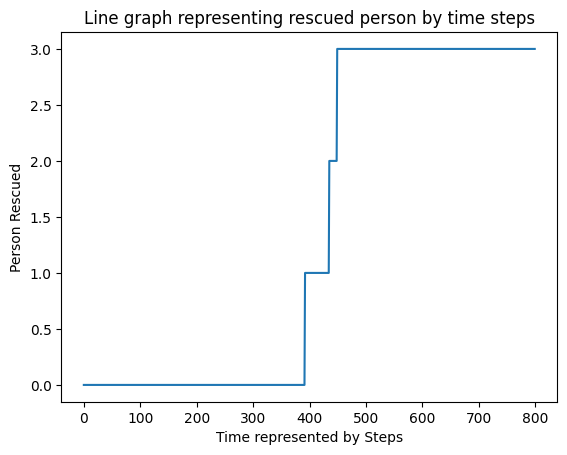

In [16]:
# line graph for when the 3 person were rescued
plt.plot(m_df["person_rescued"])  # Plot the chart
plt.xlabel("Time represented by Steps") 
plt.ylabel("Person Rescued")  
plt.title("Line graph representing rescued person by time steps")  
plt.show()

### Second performance indicator 


Below we are using the first aid robots states to get the performance.

We start by visualizing data and for that we use a line graph using the 3 most important states, Free, Busy and Finished

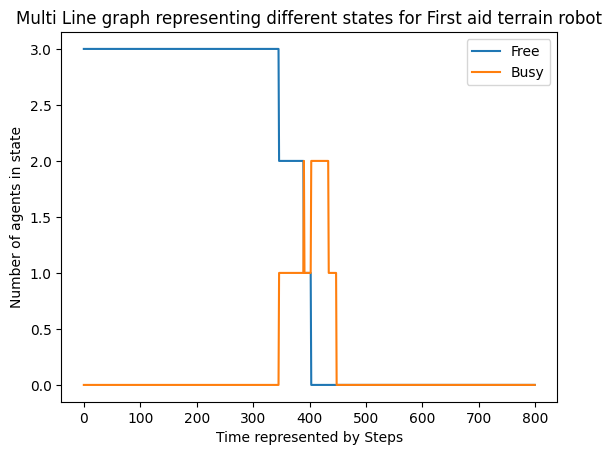

In [20]:
# we starti
#plt.plot(figsize=(900,100))
plt.plot(m_df.First_aid_free, label="Free")
plt.plot(m_df.First_aid_busy, label="Busy")
#plt.plot(m_df.First_aid_finished, label="Finished")
plt.xlabel("Time represented by Steps") 
plt.ylabel("Number of agents in state")  
plt.title("Multi Line graph representing different states for First aid terrain robot")
plt.legend()

We notice that each time a Person is found by drones only one First aid robot becomes busy and this is because we have implemented a bidding function which selects the highest first aid robot with highest battery while leaving the other two robots to charge further

In [21]:
# time stamp where we had two drones busy 
two_busy = m_df[m_df["First_aid_busy"] == 2]
# time steps where people were rescued
two_busy
two_busy.drop_duplicates()

pending_people  person_rescued  robot_arrive_to_person_step  \
390               3               0                            0   
403               2               1                            0   

     First_aid_free  First_aid_finished  First_aid_busy  
390               1                   0               2  
403               0                   1               2

From the graph and the table we can see that the First aid robots spends most of the time in a FREE state waiting for a broadcast to be sent, once first broadcast is received a bidding happens selecting the highest battery robot to be send to the boradcasted location. this function enbables us to always have the lowest battery robots in base charging while waiting for further instructions. and at a time where two people have been found we can see that two terrain robots are moving the person location at the same time this function could be further improved or changed depending on the neccesities of the states 